# Safety System Drive

In [1]:
using AutomotiveDrivingModels
using AutoViz
using AutoScenes
using Records
using PGFPlots
using Parameters

include("../AutoMobius/AutoMobius.jl")
using AutoMobius

include("../safety_validation/safety_system.jl")
"DONE"

"DONE"

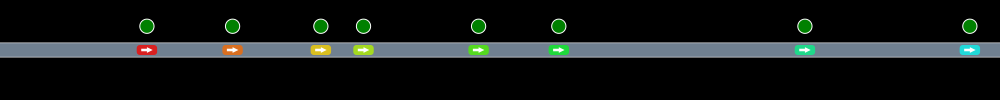

In [2]:
srand(0)
timestep = 0.1
scenegen = BayesNets1DSceneModel()
scene = MobiusScene()
roadway = Wraparound(Straight1DRoadway(200.0))
humans = Dict{Int, LaneFollowingDriver}()
behgen = ErrorableIDMBehaviorGenerator(timestep)

rand!(scene, scenegen, roadway)
rand!(humans, behgen, scene)
models = Dict{Int,SafetySystem}(id=>SafetySystem(human=WrappedLaneFollowingDriver{StoppingAccel,typeof(model)}(model)) for (id,model) in humans)

cam = StaticCamera(VecE2(100.0,0.0), 4.75)
car_colors = get_pastel_car_colors(scene)
actions = get_actions!(Array{Any}(length(scene)), scene, roadway, models)

function drawsim(t, dt=NaN)
    observe!(models, scene, roadway)
    get_actions!(actions, scene, roadway, models)
    tick!(scene, roadway, actions, timestep)
    render(scene, roadway, [SafetySystemOverlay(id, model) for (id,model) in models], 
           cam=cam, canvas_height=100, car_colors=car_colors)
end

drawsim(1)

In [4]:
using Reel
# framerate = 24
# film = roll(drawsim, fps=framerate, duration=5)
# write("mygif.gif", film) # Write to a gif file

"mygif.gif"

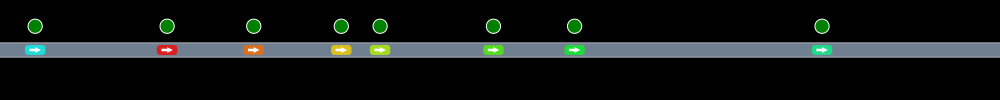

In [3]:
using Reactive
using Interact

framerate = 24
ticks = fps(framerate)
timestamps = map(_ -> time(), ticks)
s = map(drawsim, timestamps)